In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
customer = pd.read_csv("customer.csv")
customer.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Step 1: Data Preprocessing

# Convert TotalCharges to numeric (some values may be empty strings, so set errors='coerce')
customer['TotalCharges'] = pd.to_numeric(customer['TotalCharges'], errors='coerce')

# Drop rows with missing values
customer.dropna(inplace=True)

# Drop customerID as it's not useful for prediction
customer.drop('customerID', axis=1, inplace=True)

# Convert target variable 'Churn' to binary (Yes: 1, No: 0)
customer['Churn'] = customer['Churn'].map({'Yes': 1, 'No': 0})

# Identify categorical and numerical columns
categorical_cols = customer.select_dtypes(include=['object']).columns.tolist()
numerical_cols = customer.select_dtypes(include=['int64', 'float64']).columns.tolist()

# One-hot encode categorical features
customer = pd.get_dummies(customer, columns=categorical_cols, drop_first=True)



In [4]:
customer.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


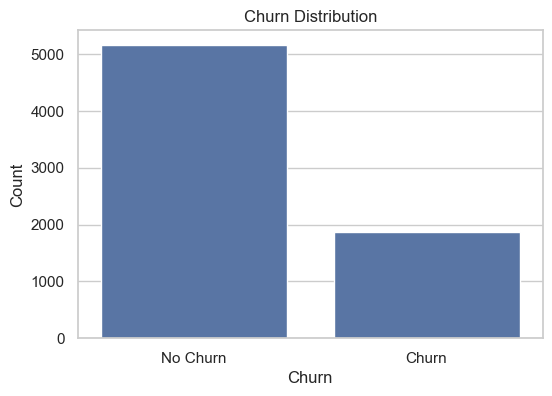

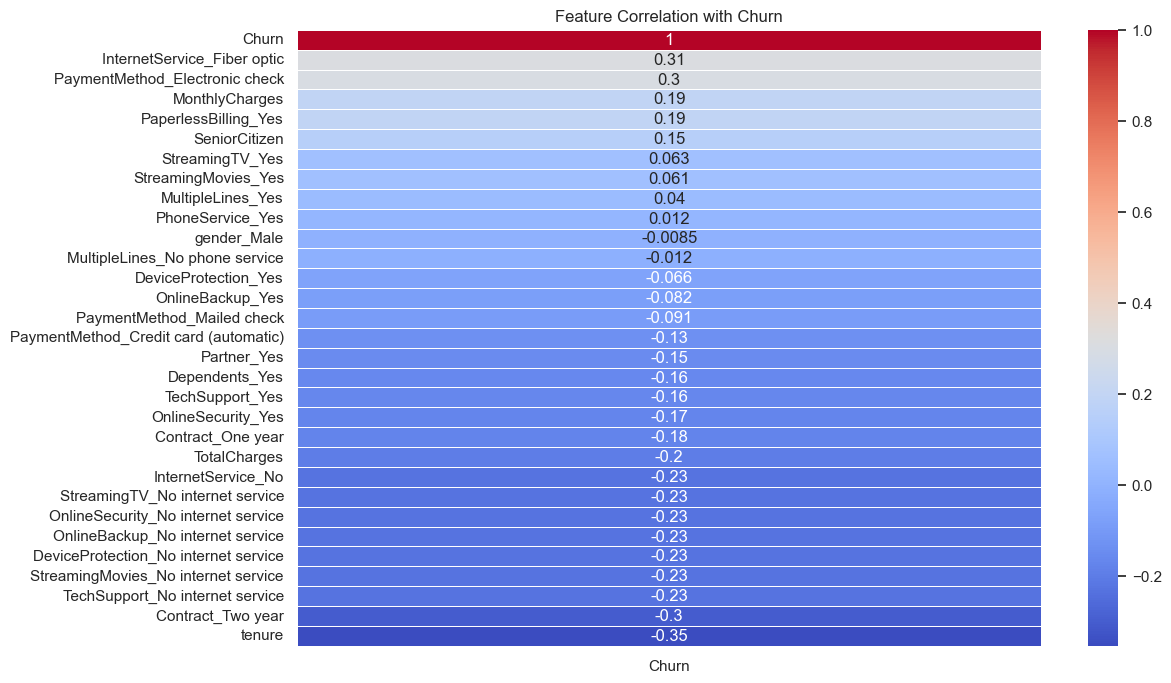

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Exploratory Data Analysis

# Set up plotting style
sns.set(style="whitegrid")

# Plot churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=customer)
plt.title('Churn Distribution')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Correlation heatmap with Churn
plt.figure(figsize=(12, 8))
corr = customer.corr()
sns.heatmap(corr[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation with Churn')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 3: Feature Engineering & Scaling

# Separate features and target
X = customer.drop('Churn', axis=1)
y = customer['Churn']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Output shapes as confirmation
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((5625, 30), (1407, 30), (5625,), (1407,))

In [7]:
customer.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 4: Model Building - Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report


(0.8038379530916845,
 array([[916, 117],
        [159, 215]]),
 '              precision    recall  f1-score   support\n\n           0       0.85      0.89      0.87      1033\n           1       0.65      0.57      0.61       374\n\n    accuracy                           0.80      1407\n   macro avg       0.75      0.73      0.74      1407\nweighted avg       0.80      0.80      0.80      1407\n')

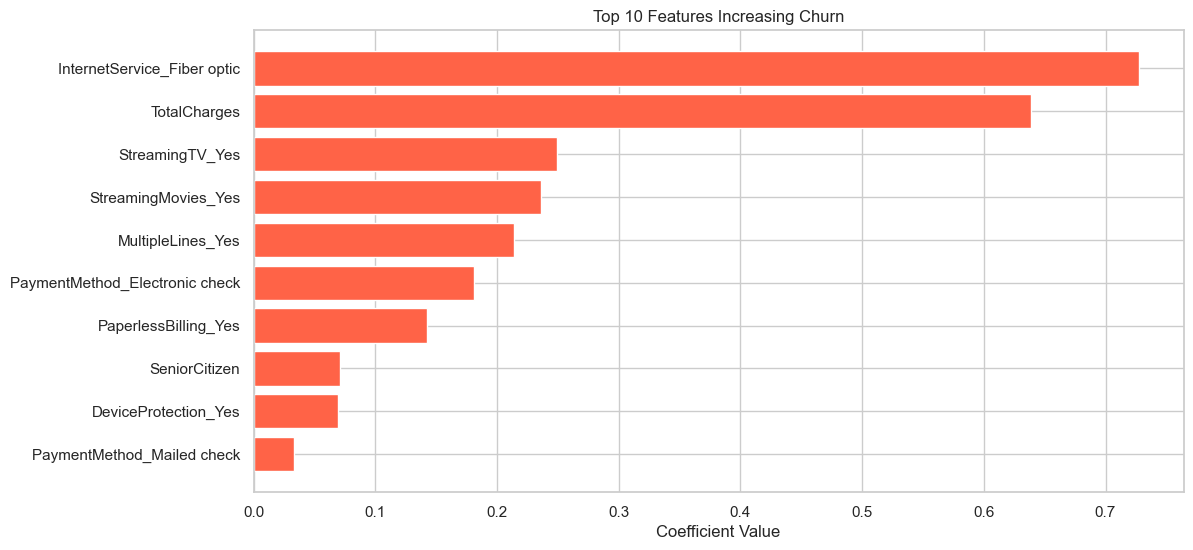

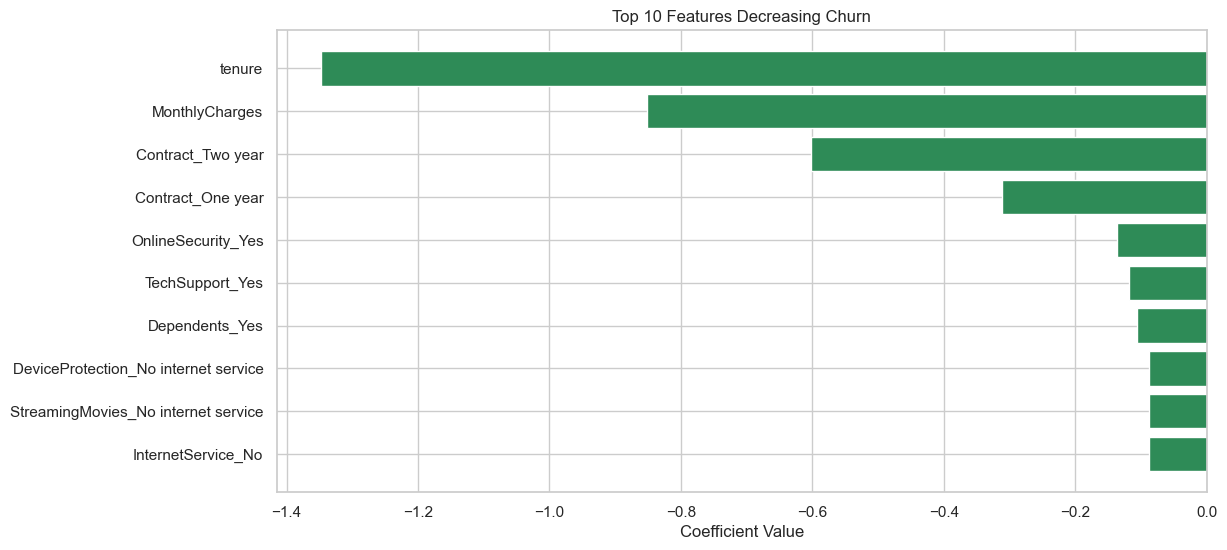

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use feature names from X_train
feature_names = X_train.columns

# Create DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr_model.coef_[0]
})

# Sort by absolute value
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance.sort_values(by='Abs_Coefficient', ascending=False, inplace=True)

# Top 10 features increasing churn
top_positive = feature_importance.sort_values(by='Coefficient', ascending=False).head(10)

# Top 10 features decreasing churn
top_negative = feature_importance.sort_values(by='Coefficient').head(10)

# Plot top positive features
plt.figure(figsize=(12, 6))
plt.barh(top_positive['Feature'], top_positive['Coefficient'], color='tomato')
plt.title('Top 10 Features Increasing Churn')
plt.xlabel('Coefficient Value')
plt.gca().invert_yaxis()
plt.show()

# Plot top negative features
plt.figure(figsize=(12, 6))
plt.barh(top_negative['Feature'], top_negative['Coefficient'], color='seagreen')
plt.title('Top 10 Features Decreasing Churn')
plt.xlabel('Coefficient Value')
plt.gca().invert_yaxis()
plt.show()


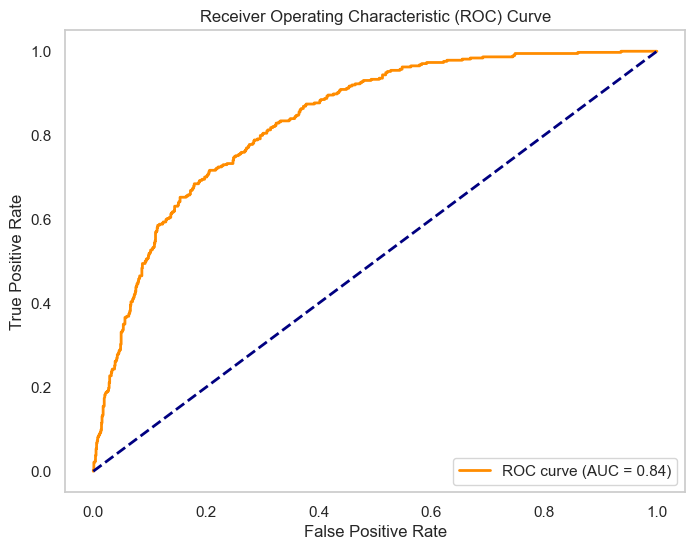

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
